# Question 2 a)

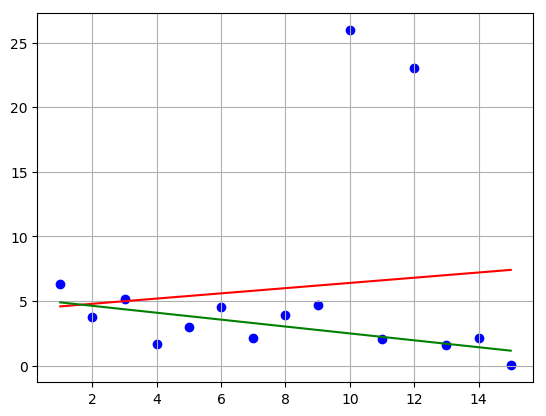

best fit (with outliers):
a1:0.20171428571419991
b1:4.3816190476177965

best fit (without outliers):
a2:-0.26680023923439117
b2:5.159724880381779


In [3]:
x = [1:15;]
y = [6.31 3.78 5.12 1.71 2.99 4.53 2.11 3.88 4.67 26 2.06 23 1.58 2.17 0.02]

xDrop = [1 2 3 4 5 6 7 8 9 11 13 14 15]
yDrop = [6.31 3.78 5.12 1.71 2.99 4.53 2.11 3.88 4.67 2.06 1.58 2.17 0.02]

using JuMP, Gurobi, PyPlot

# with outliner
m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, a1)
@variable(m, b1)

@objective(m, Min, sum{(y[i]-a1*x[i]-b1)^2, i=1:15})

solve(m)

a1 = getvalue(a1)
b1 = getvalue(b1)

println("best fit (with outliers):")
println("a1:", a1)
println("b1:", b1)

println()

# without outliner
n = Model(solver=GurobiSolver(OutputFlag=0))

@variable(n, a2)
@variable(n, b2)

@objective(n, Min, sum{(yDrop[i]-a2*xDrop[i]-b2)^2, i=1:13})

solve(n)

a2 = getvalue(a2)
b2 = getvalue(b2)

println("best fit (without outliers):")
println("a2:", a2)
println("b2:", b2)

scatter(x, y, color="blue")
plot(x, a1'*x.+b1, color="red")
plot(x, a2'*x.+b2, color="green")
grid()

The line with outliner (red) is mostly higher and more inaccurate. We can conclude that the outliner affects it heavily.

## b)

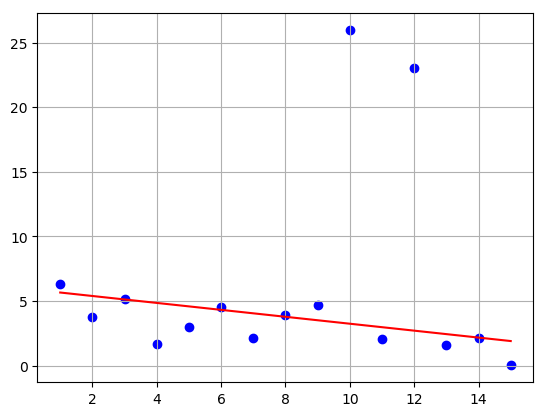

best fit (with outliers):
a:-0.2681818181818182
b:5.924545454545455


In [5]:
x = [1:15;]
y = [6.31 3.78 5.12 1.71 2.99 4.53 2.11 3.88 4.67 26 2.06 23 1.58 2.17 0.02]

using JuMP, Gurobi, PyPlot

# with outliers
m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, a)
@variable(m, b)
@variable(m, t[1:15])

for i in 1:15
    @constraint(m, y[i]-a*x[i]-b <= t[i])
    @constraint(m, -t[i] <= y[i]-a*x[i]-b)
end

@objective(m, Min, sum(t))

solve(m)

a = getvalue(a)
b = getvalue(b)

println("best fit (with outliers):")
println("a:", a)
println("b:", b)

scatter(x, y, color="blue")
plot(x, a'*x.+b, color="red")
grid()

By comparing with previous part, it handles better. We can determine that point by calculating error as below.

In [7]:
L1_err = 0
L2_err = 0

for i in 1:13
    L2_err = L2_err + (yDrop[i]-a1*xDrop[i]-b1)^2
    L1_err = L1_err + (yDrop[i]-a*xDrop[i]-b)^2
end
println("L2 error:", L2_err)
println("L1 error:", L1_err)

L2 error:173.33798224020626
L1 error:25.691026446280993


## c)

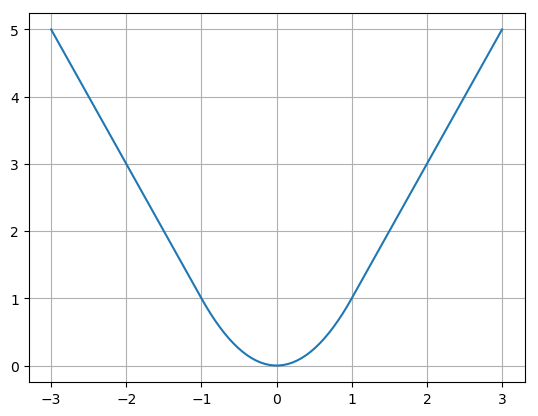

In [51]:
using JuMP, Gurobi, PyPlot

M = 1

X = range(-3, stop=3, length=100)
y = []

function HuberLoss(i)
    m = Model(solver=GurobiSolver(OutputFlag=0))

    @variable(m, v >= 0)
    @variable(m, w <= M)
    
    # Absolute value of i
    @constraint(m, i <= w+v)
    @constraint(m, -w-v <= i)
    
    @objective(m, Min, w^2 + 2*M*v)

    solve(m)
    
    return getobjectivevalue(m)
end

for i in X 
    push!(y, HuberLoss(i))
end

plot(X, y)
grid()

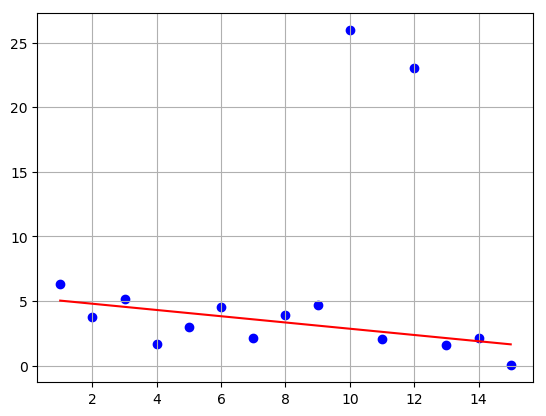

best fit of Huber loss:
a:-0.24172477381956128
b:5.272477100653651


In [9]:
x = [1:15;]
y = [6.31 3.78 5.12 1.71 2.99 4.53 2.11 3.88 4.67 26 2.06 23 1.58 2.17 0.02]

using JuMP, Gurobi, PyPlot

M = 1
huber_loss = Model(solver=GurobiSolver(OutputFlag=0))

@variable(huber_loss, a)
@variable(huber_loss, b)
@variable(huber_loss, v[1:15] >= 0)
@variable(huber_loss, w[1:15] <= M)

for i in 1:15
    @constraint(huber_loss, y[i]-a*x[i]-b <= w[i]+v[i])
    @constraint(huber_loss, -w[i]-v[i] <= y[i]-a*x[i]-b)
end

@objective(huber_loss, Min, sum{w[i]^2+2*M*v[i], i=1:15})

solve(huber_loss)

a = getvalue(a)
b = getvalue(b)

println("best fit of Huber loss:")
println("a:", a)
println("b:", b)

scatter(x, y, color="blue")
plot(x, a'*x.+b, color="red")
grid()